<a href="https://colab.research.google.com/github/kuruvasatya/SVM/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
col_names = list(cancer.feature_names)
col_names.append('target')

data = pd.DataFrame(np.c_[cancer.data,cancer.target],columns=col_names)

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
data.shape

(569, 31)

In [10]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
data['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

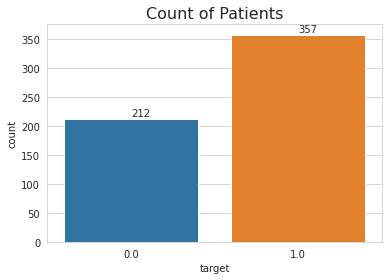

In [9]:
a = sns.countplot('target',data=data)
plt.title('Count of Patients',fontsize=16)
for p in a.patches:
  height = p.get_height()
  a.text(p.get_x()+p.get_width()/2,height + 5,height )

In [0]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [8]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9598

Classification Report: 
 	Precision: 0.9565217391304348
	Recall Score: 0.979757085020243
	F1 score: 0.9680000000000001

Confusion Matrix: 
 [[140  11]
 [  5 242]]

Test Result:
accuracy score: 0.9824561403508771

Classification Report: 
 	Precision: 0.9908256880733946
	Recall Score: 0.9818181818181818
	F1 score: 0.9863013698630138

Confusion Matrix: 
 [[ 60   1]
 [  2 108]]



In [9]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9874

Classification Report: 
 	Precision: 0.9879032258064516
	Recall Score: 0.9919028340080972
	F1 score: 0.98989898989899

Confusion Matrix: 
 [[148   3]
 [  2 245]]

Test Result:
accuracy score: 0.9707602339181286

Classification Report: 
 	Precision: 0.9565217391304348
	Recall Score: 1.0
	F1 score: 0.9777777777777777

Confusion Matrix: 
 [[ 56   5]
 [  0 110]]



In [10]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[151   0]
 [  0 247]]

Test Result:
accuracy score: 0.6432748538011696

Classification Report: 
 	Precision: 0.6432748538011696
	Recall Score: 1.0
	F1 score: 0.7829181494661921

Confusion Matrix: 
 [[  0  61]
 [  0 110]]



In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_std = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=5)

In [13]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)


print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
accuracy score: 0.9774

Classification Report: 
 	Precision: 0.9722222222222222
	Recall Score: 0.9919028340080972
	F1 score: 0.9819639278557114

Confusion Matrix: 
 [[144   7]
 [  2 245]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]

=======================Polynomial Kernel SVM==========================
Train Result:
accuracy score: 0.7814

Classification Report: 
 	Precision: 0.7395209580838323
	Recall Score: 1.0
	F1 score: 0.8502581755593803

Confusion Matrix: 
 [[ 64  87]
 [  0 247]]

Test Result:
accuracy score: 0.8538011695906432

Classification Report: 
 	Precision: 0.8148148148148148
	Recall Score: 1.0
	F1 score: 0.8979591836734693

Confusion Matrix: 
 [[ 36  25]
 [  0 110]]

=======================Radial Kernel SVM==========================
Train 

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

grid.fit(X_train, y_train)

print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Result:
accuracy score: 0.9824

Classification Report: 
 	Precision: 0.9761904761904762
	Recall Score: 0.9959514170040485
	F1 score: 0.9859719438877755

Confusion Matrix: 
 [[145   6]
 [  1 246]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]



[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [17]:
grid.best_params_

{'C': 10, 'gamma': 0.25, 'kernel': 'rbf'}

In [19]:
model = SVC(kernel='rbf',C=10,gamma=0.25)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)


Train Result:
accuracy score: 0.9824

Classification Report: 
 	Precision: 0.9761904761904762
	Recall Score: 0.9959514170040485
	F1 score: 0.9859719438877755

Confusion Matrix: 
 [[145   6]
 [  1 246]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]

